In [12]:
import numpy as np
import pandas as pf
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [13]:
data = np.array([
    [1.0, 2.0],
    [1.5, 1.8],
    [5.0, 8.0],
    [8.0, 8.0],
    [1.0, 0.6],
    [9.0, 11.0],
    [8.0, 2.0],
    [10.0, 2.0],
    [9.0, 3.0]
])

In [14]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(data)

c:\Users\samid\miniconda3\envs\master_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\samid\miniconda3\envs\master_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3)

In [15]:
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
print("Cluster Labels:", labels)
print("Centroids:", centroids)

Cluster Labels: [1 1 2 2 1 2 0 0 0]
Centroids: [[9.         2.33333333]
 [1.16666667 1.46666667]
 [7.33333333 9.        ]]


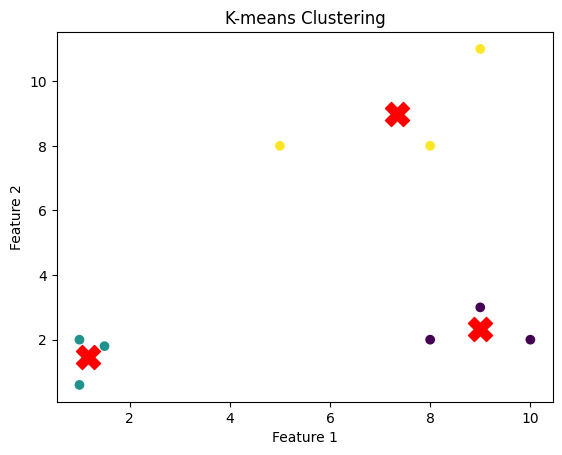

In [16]:
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis')

# Plot the centroids
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', marker='X')
plt.title('K-means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [18]:
#manual kmeans clusters
k = 3
max_iters = 100
tolerance = 1e-4 # for convergence
#choose k centroids at random
centroidsM = data[np.random.choice(data.shape[0], k, replace=False)]
print(centroidsM)
for i in range(max_iters):
    clusters = [[] for _ in range(k)]
    for point in data:
        distances = [np.linalg.norm(point - centroid) for centroid in centroidsM]
        closest = np.argmin(distances)
        clusters[closest].append(point)
    updated_centroids = np.array([np.mean(cluster, axis=0) if cluster else centroidsM[idx]
                                  for idx, cluster in enumerate(clusters)])
    if np.all(np.abs(updated_centroids - centroidsM) < tolerance):
        break
    centroidsM = updated_centroids
        
    labelsM = np.zeros(data.shape[0], dtype=int)
    for cluster_idx, cluster in enumerate(clusters):
        for point in cluster:
            point_idx = np.where((data == point).all(axis=1))[0][0]
            labelsM[point_idx] = cluster_idx
    
print("Manual K-means Centroids:", centroids)
print("Manual K-means Labels:", labelsM)

[[ 9.  11. ]
 [10.   2. ]
 [ 1.5  1.8]]
Manual K-means Centroids: [[9.         2.33333333]
 [1.16666667 1.46666667]
 [7.33333333 9.        ]]
Manual K-means Labels: [2 2 0 0 2 0 1 1 1]


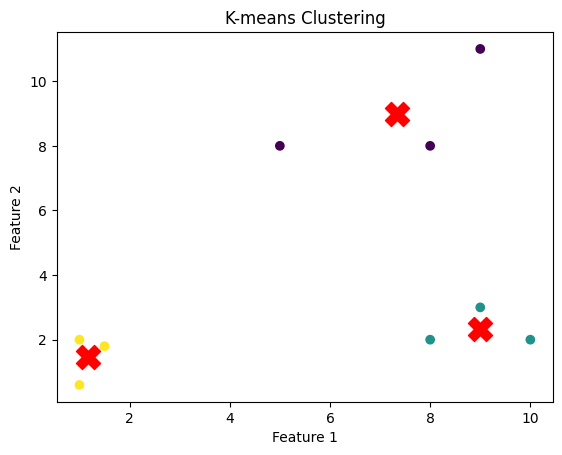

In [19]:
plt.scatter(data[:, 0], data[:, 1], c=labelsM, cmap='viridis')

# Plot the centroids
plt.scatter(centroidsM[:, 0], centroidsM[:, 1], s=300, c='red', marker='X')
plt.title('K-means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [20]:
print("Centroid Differences:", np.abs(centroids - centroids))
print("Label Differences:", (labels == labels).sum(), "out of", len(labels), "points match.")

Centroid Differences: [[0. 0.]
 [0. 0.]
 [0. 0.]]
Label Differences: 9 out of 9 points match.
